# Projet SER

In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import kaggle

from IPython.display import Audio
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

### Connect to kaggle

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [ ]:
!echo '{"username":"siakesophie","key":"a14396222d9d4576cce4412a57731f71"}' > ~/.kaggle/kaggle.json

In [ ]:
api_token = {"username":"siakesophie","key":"a14396222d9d4576cce4412a57731f71"}

with open('/Users/siakesophie/.kaggle/kaggle.json', 'w') as file:
        json.dump(api_token, file)

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

### 1. RAVDESS

In [ ]:
!kaggle datasets list -s RAVDESS

In [ ]:
# extract the files from ravdess database
kaggle.api.dataset_download_files('uwrfkaggler/ravdess-emotional-speech-audio', path='data_SIAKE', unzip=True)

In [2]:
Ravdess = "../data_SIAKE/audio_speech_actors_01-24"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        if len(part) >= 3:
            # third part in each file represents the emotion associated to that file.
            file_emotion.append(int(part[2]))
            file_path.append(Ravdess + '/' + dir + '/' + file)

In [4]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
1,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
2,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
3,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
4,disgust,../data_SIAKE/audio_speech_actors_01-24/Actor_...


### 2. Crema DataFrame

In [ ]:
!kaggle datasets list -s Crema

In [ ]:
# extract the files from Crema database
kaggle.api.dataset_download_files('ejlok1/cremad', path='data_SIAKE', unzip=True)

In [5]:
Crema = "../data_SIAKE/AudioWAV"

In [6]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + '/'+  file)
    # storing file emotions
    part=file.split('_')
    
    if len(part) >= 3:
        if part[2] == 'SAD':
            file_emotion.append('sad')
        elif part[2] == 'ANG':
            file_emotion.append('angry')
        elif part[2] == 'DIS':
            file_emotion.append('disgust')
        elif part[2] == 'FEA':
            file_emotion.append('fear')
        elif part[2] == 'HAP':
            file_emotion.append('happy')
        elif part[2] == 'NEU':
            file_emotion.append('neutral')
        else:
            file_emotion.append('Unknown')
            
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,../data_SIAKE/AudioWAV/1022_ITS_ANG_XX.wav
1,angry,../data_SIAKE/AudioWAV/1037_ITS_ANG_XX.wav
2,neutral,../data_SIAKE/AudioWAV/1060_ITS_NEU_XX.wav
3,neutral,../data_SIAKE/AudioWAV/1075_ITS_NEU_XX.wav
4,disgust,../data_SIAKE/AudioWAV/1073_IOM_DIS_XX.wav


### 3. TESS Dataframe

In [ ]:
!kaggle datasets list -s TESS

In [ ]:
# extract the files from Tess database
kaggle.api.dataset_download_files('ejlok1/toronto-emotional-speech-set-tess', path='data_SIAKE', unzip=True)

In [7]:
Tess = "../data_SIAKE/TESS Toronto emotional speech set data"

In [8]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/' + dir)
    for file in directories:
        part = file.split('.')[0]
        split_part = part.split('_')
        
        # Check if the split result has the expected number of parts
        if len(split_part) >= 3:
            part = split_part[2]
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,../data_SIAKE/TESS Toronto emotional speech se...
1,disgust,../data_SIAKE/TESS Toronto emotional speech se...
2,disgust,../data_SIAKE/TESS Toronto emotional speech se...
3,disgust,../data_SIAKE/TESS Toronto emotional speech se...
4,disgust,../data_SIAKE/TESS Toronto emotional speech se...


### Final dataframe with all the files paths in local

In [10]:
# creating Dataframe using all the 3 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df], axis = 0)
data_path.to_parquet("data_path.parquet",index=False)
data_path.head()

,Emotions,Path
0,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
1,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
2,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
3,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
4,disgust,../data_SIAKE/audio_speech_actors_01-24/Actor_...


In [13]:
data_paths = pd.read_parquet("data_path.parquet")
data_paths.head()

,Emotions,Path
0,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
1,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
2,fear,../data_SIAKE/audio_speech_actors_01-24/Actor_...
3,angry,../data_SIAKE/audio_speech_actors_01-24/Actor_...
4,disgust,../data_SIAKE/audio_speech_actors_01-24/Actor_...


Count of emotions

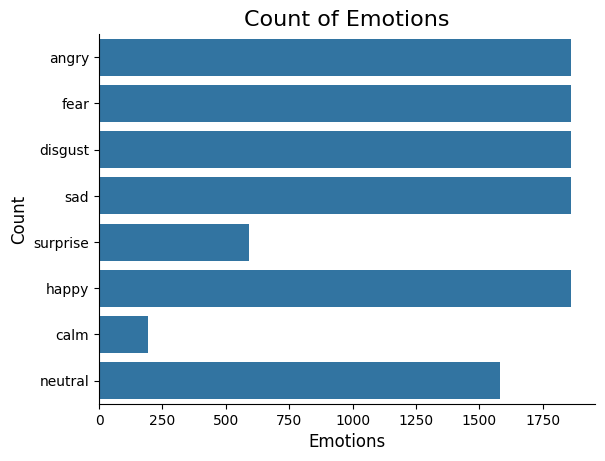

In [14]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_paths.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Data Augmentation
Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.

The objective is to make our model invariant to those perturbations and enhace its ability to generalize.

In order to this to work adding the perturbations must conserve the same label as the original training sample.

In images data augmention can be performed by shifting the image, zooming, rotating ...

In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=2)


#### Simple audio

In [16]:
# taking any example and checking for techniques.
path = np.array(data_paths.Path)[1]
data, sample_rate = librosa.load(path)

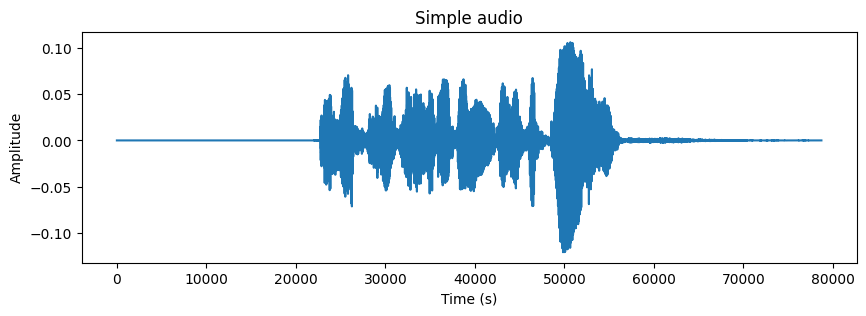

In [17]:
# Plot the waveform using matplotlib
plt.figure(figsize=(10, 3))
plt.plot(data)
plt.title('Simple audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display audio player
Audio(data, rate=sample_rate)

#### Noise injection

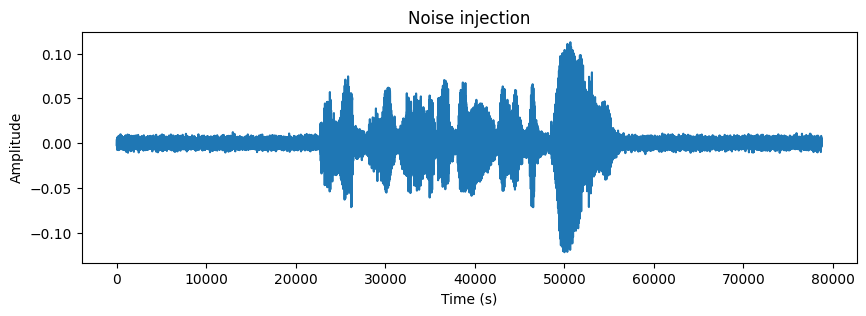

In [18]:
x = noise(data)
plt.figure(figsize=(10, 3))
plt.plot(x)
plt.title('Noise injection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

#### Stretching

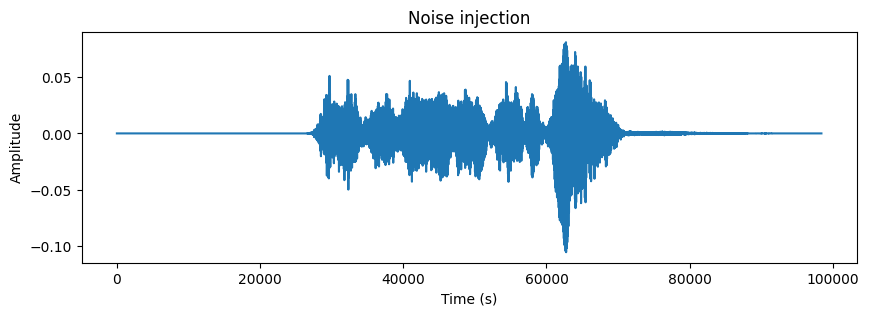

In [19]:
x = stretch(data)
plt.figure(figsize=(10, 3))
plt.plot(x)
plt.title('Noise injection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

#### Shifting

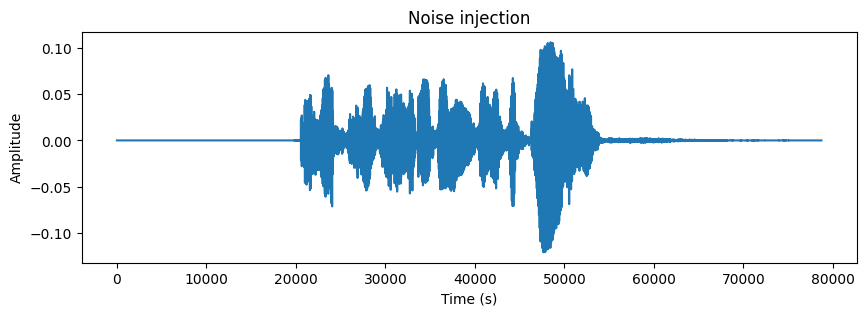

In [20]:
x = shift(data)
plt.figure(figsize=(10, 3))
plt.plot(x)
plt.title('Noise injection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

#### Pitching

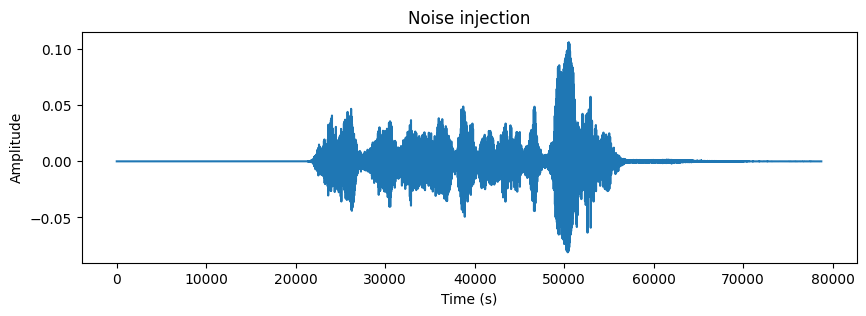

In [21]:
x = pitch(data, sample_rate)
plt.figure(figsize=(10, 3))
plt.plot(x)
plt.title('Noise injection')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

### Extract Features

np.hstack is then used to horizontally concatenate these feature vectors into a single, one-dimensional array (result), which becomes the feature representation for that audio file.

In [22]:
def extract_features(data, sample_rate):
    # ZCR (Zero Crossing Rate)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Energy
    energy = np.mean((librosa.feature.rms(y=data)).T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)

    # Spectral Spread
    spectral_spread = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)

    # Spectral Flux
    spectral_flux = np.mean(librosa.onset.onset_strength(y=data, sr=sample_rate).T, axis=0)

    # MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)

    # Chroma Vector
    chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0)

    # Stack all features horizontally
    result = np.hstack((zcr, energy, spectral_centroid, spectral_spread, spectral_flux, mfcc, chroma))
    return result

In [26]:
def get_features_no_augmentation(audio_path):
    # duration and offset are used to take care of the no audio in start 
    # and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)
    
    result = extract_features(data, sample_rate)
    
    return result

In [31]:
def get_features_with_augmentation(path):
    # duration and offset are used to take care of the no audio in start 
    # and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

#### Extract features without data augmentation.

In [40]:
X_no_augmentation, Y_no_augmentation= [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features_no_augmentation(path)
    X_no_augmentation.append(feature)
    Y_no_augmentation.append(emotion)

/Users/siakesophie/Local_Docs/ING_3/S9/Engineering_project/project/SERAPP/.env-serapp/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [45]:
len(X_no_augmentation), len(Y_no_augmentation), data_path.Path.shape

(11682, 11682, (11682,))

#### Extract features with data augmentation

In [35]:
X_with_augmentation, Y_with_augmentation = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features_with_augmentation(path)
    for ele in feature:
        X_with_augmentation.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y_with_augmentation.append(emotion)

In [44]:
len(X_with_augmentation), len(Y_with_augmentation), data_path.Path.shape

(35046, 35046, (11682,))

### Création du dataset

In [37]:
# List of feature names
feature_names = [
    'ZCR', 'Energy', 'SpectralCentroid', 'SpectralSpread', 'SpectralFlux',
    'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7',
    'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13',
    'Chroma1', 'Chroma2', 'Chroma3', 'Chroma4', 'Chroma5', 'Chroma6',
    'Chroma7', 'Chroma8', 'Chroma9', 'Chroma10', 'Chroma11', 'Chroma12'
]


### Dataframe with features from data without augmentation 

In [41]:
Features_without_augmentation = pd.DataFrame(X_no_augmentation, columns=feature_names)
Features_without_augmentation['labels'] = Y_no_augmentation
Features_without_augmentation.to_parquet('../data/datasets/features_without_data_augmentation.parquet', index=False)
Features_without_augmentation.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.321975,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry
1,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.285417,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear
2,0.200589,0.061085,3130.434636,2301.913172,2.341648,-315.505432,27.667685,-38.753201,0.213876,-14.901350,...,0.237158,0.168251,0.235008,0.320012,0.395711,0.443678,0.420142,0.433307,0.439407,fear
3,0.177156,0.040083,2874.637946,2220.399237,2.429970,-346.149780,52.521111,-14.139482,6.766320,-16.968788,...,0.367692,0.330350,0.368875,0.278672,0.218055,0.257016,0.376277,0.342528,0.312693,angry
4,0.175203,0.006512,2897.465696,2159.335761,2.339541,-532.369385,70.741547,-1.425078,11.303340,-9.632647,...,0.345111,0.322321,0.372758,0.350202,0.387294,0.438436,0.350818,0.331767,0.371133,disgust


### Dataframe with features from data augmentation 

In [49]:
Features_with_augmentation = pd.DataFrame(X_with_augmentation, columns=feature_names)
Features_with_augmentation['labels'] = Y_with_augmentation
Features_with_augmentation.to_parquet('../data/datasets/features_with_data_augmentation.parquet', index=False)
Features_with_augmentation.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.321975,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry
1,0.355532,0.022118,4779.178496,3151.482991,1.258613,-232.722713,13.950570,3.320304,-0.422506,-4.984953,...,0.493244,0.494773,0.545488,0.415705,0.412091,0.510564,0.548447,0.561863,0.527673,angry
2,0.230451,0.008324,3406.733059,2340.013524,1.496660,-491.448151,47.446922,-12.718010,-4.566107,-22.940006,...,0.209843,0.225962,0.267457,0.327613,0.502695,0.313019,0.257691,0.319452,0.360415,angry
3,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.285417,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear
4,0.326448,0.014248,4586.606062,3168.801230,1.250617,-311.395009,17.698572,8.428658,0.337073,-0.577668,...,0.530345,0.481812,0.458058,0.429658,0.432802,0.442983,0.469787,0.516060,0.554791,fear
